In [2]:
%load_ext autoreload
%autoreload 2

import os 
import sys
sys.path.append("../")

from vector_graph.bipartite_graph import BipartiteGraph
from utils.parse_arxiv import make_keyword_id, parse_authors, parse_categories
import pandas as pd
import pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
chunks = pd.read_json('../data/arxiv-metadata-oai-snapshot.json', lines=True, chunksize=100)
keyword_author_ids = set()
keyword_category_ids = set()
data_ids = set()
edges = []
for chunk in chunks:
    df = chunk[['id', 'authors', 'categories']]
    for i, row in df.iterrows():
        data_id = row['id']
        print(parse_authors(row['authors'])[0])
        print(data_id)
        # print(parse_categories(row['categories']))
        keyword_author_id = make_keyword_id("authors", parse_authors(row['authors'])[0])
        # keyword_category_id = make_keyword_id("categories", parse_categories(row['categories']))
        edges.append((data_id, keyword_author_id))
        # edges.append((data_id, keyword_category_id))
        keyword_author_ids.add(keyword_author_id)
        data_ids.add(data_id)
        # keyword_category_ids.add(keyword_category_id)
    break

C.Bal\'azs
704.0001
IleanaStreinuandLouisTheran
704.0002
HongjunPan
704.0003
DavidCallan
704.0004
WaelAbu-ShammalaandAlbertoTorchinsky
704.0005
Y.H.PongandC.K.Law
704.0006
AlejandroCorichi
704.0007
DamianC.Swift
704.0008
PaulHarvey
704.0009
SergeiOvchinnikov
704.001
CliftonCunninghamandLassinaDembele
704.0011
DohoonChoi
704.0012
DohoonChoiandYoungJuChoie
704.0013
KoichiFujii
704.0014
ChristianStahn
704.0015
Chao-HsiChang
704.0016
NcebaMhlahlo
704.0017
AndreasGustavsson
704.0018
NorioKonno
704.0019
TheBABARCollaboration
704.002
VanessaCasagrande
704.0021
SimonJ.A.MalhamandAnkeWiese
704.0022
M.A.Loukitcheva
704.0023
A.A.Serga
704.0024
A.S.Mishchenko(1and2)andN.Nagaosa(1and3)((1)CREST
704.0025
RobertP.C.deMarrais
704.0026
M.O.Goerbig
704.0027
P\'eterE.Frenkel
704.0028
ZhanShu
704.0029
J.P.HagueandN.d'Ambrumenil
704.003
V.M.Biryukov(Serpukhov
704.0031
A.Esteban-Pretel
704.0032
MaximA.Yurkin
704.0033
VasilyOgryzko
704.0034
MaximA.Yurkin
704.0035
LimingWangandEduardoD.Sontag
704.0036
MaximA.

In [7]:
G = BipartiteGraph()
G.add_data_nodes(data_ids)
G.add_keyword_nodes(keyword_author_ids)
G.add_raw_edges(edges)

Num data points:  100
Num Authors:  95
True


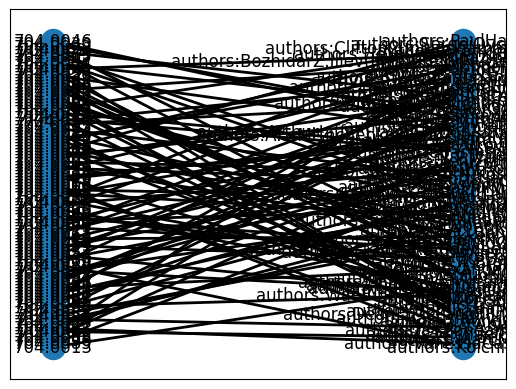

In [8]:
# Print the graph
print("Num data points: ", len(data_ids))
print("Num Authors: ", len(keyword_author_ids))
print(G.is_bipartite())
G.draw_graph()